In [1]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
#os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)


In [2]:
raw_data = pd.read_excel('Sample - Superstore.xls')
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262.0,2,0.0,41.9
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9,3,0.0,219.6
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6,2,0.0,6.9
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.6,5,0.5,-383.0
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.4,2,0.2,2.5


In [3]:
raw_data.shape

(9994, 21)

## Simplify the data 

In [4]:
# Check the data length and breadth

print('Data Columns:', raw_data.columns)
print('Data Index', raw_data.index)

Data Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Data Index RangeIndex(start=0, stop=9994, step=1)


In [5]:
# Group by relevant Columns

#Variables for groupby
variables = ['Order Date','Category', 'Sales']

#Variables to groupby 
group_variables = variables[:2]
outcome_variables = [2]


In [6]:
#Grouping the raw_data
base = raw_data[['Order Date','Category', 'Sales']].groupby(group_variables).sum().reset_index()

In [7]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.4
1,2011-01-05,Office Supplies,288.1
2,2011-01-06,Office Supplies,19.5
3,2011-01-07,Furniture,"2,573.8"
4,2011-01-07,Office Supplies,685.3


In [8]:
base.shape

(2864, 3)

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2864 non-null   datetime64[ns]
 1   Category    2864 non-null   object        
 2   Sales       2864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.2+ KB


In [10]:
# Pandas Dataframe types
for x in base.columns:
    print(x, type(base[x]), base[x].dtype)

Order Date <class 'pandas.core.series.Series'> datetime64[ns]
Category <class 'pandas.core.series.Series'> object
Sales <class 'pandas.core.series.Series'> float64


### Extracting Numpy Arrays:
#### It isnt always necessary to extract np.arrays. But some applications use Numpy arrays as inputs and can bypass Pandas if desired.  

In [11]:
order_date = np.array(base['Order Date'])
category = np.array(base['Category'])
sales = np.array(base['Sales'])

In [12]:
print('Order Date: ', type(order_date), order_date.dtype)
print('Category: ', type(category), category.dtype)
print('Sales: ', type(sales), sales.dtype)

Order Date:  <class 'numpy.ndarray'> datetime64[ns]
Category:  <class 'numpy.ndarray'> object
Sales:  <class 'numpy.ndarray'> float64


In [13]:
df_from_array = pd.DataFrame({'Order Date': order_date, 'Category': category, 'Sales':sales})
df_from_array.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

### Working with order_date

In [14]:
order_date

array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

The date time stmap on the order_date is 'ns' which is nano second. 
Lets convert it to Daily and create another array

In [15]:
order_date_daily = np.array(order_date, dtype = 'datetime64[D]')

In [16]:
order_date_monthly = np.array(order_date,dtype ='datetime64[M]')


In [17]:
len(np.unique(order_date_monthly))

48

### Setting Date as index

In [18]:
base.set_index('Order Date', inplace=True)
base

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3
...,...,...
2014-12-30,Office Supplies,282.4
2014-12-30,Technology,302.4
2014-12-31,Furniture,323.1


In [19]:
base.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)

### Subsetting Data

In [20]:
display(base['2013-12':])

,Category,Sales
Order Date,,
2013-12-01,Furniture,390.0
2013-12-01,Office Supplies,544.0
2013-12-01,Technology,36.2
2013-12-02,Furniture,"1,801.3"
2013-12-02,Office Supplies,"4,382.4"
...,...,...
2014-12-30,Office Supplies,282.4
2014-12-30,Technology,302.4
2014-12-31,Furniture,323.1


In [21]:
display(base[base['Category']=='Office Supplies']['2011':'2012-02'].tail())
#display(base[base['Category']=='Office Supplies']['2011':'2012-02'].head())

,Category,Sales
Order Date,,
2012-02-22,Office Supplies,79.4
2012-02-23,Office Supplies,37.8
2012-02-25,Office Supplies,25.9
2012-02-27,Office Supplies,20.5
2012-02-29,Office Supplies,58.7


### Components of DateTime

In [22]:
print('Day:' ,base.index.day, '\n')
print('Month: ', base.index.month, '\n')

Day: Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864) 

Month:  Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Order Date', length=2864) 



In [23]:
#base['DayofWeek'] = base.index.dayofweek # 0- Monday, 6- Sunday
#base

In [24]:
base

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.4
2011-01-05,Office Supplies,288.1
2011-01-06,Office Supplies,19.5
2011-01-07,Furniture,"2,573.8"
2011-01-07,Office Supplies,685.3
...,...,...
2014-12-30,Office Supplies,282.4
2014-12-30,Technology,302.4
2014-12-31,Furniture,323.1


## Standardising the Data _ 

### 1. Using Pivot to adjust for duplicate values
No duplicates
No missing values

In [25]:
# Reset Index first
base.reset_index( inplace=True)

# Apply Pivot
sales_pivot = base.pivot(index='Order Date', columns= 'Category', values= 'Sales')

In [26]:
sales_pivot.fillna(0, inplace=True)
sales_pivot

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0
...,...,...,...
2014-12-27,0.0,814.6,0.0
2014-12-28,0.0,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9


In [27]:
print('The number of unique dates in our data is: ', len(sales_pivot.index.unique()))
# No duplicate row

The number of unique dates in our data is:  1238


### 2. Using Unstack function to create the same data

In [28]:
sales_unstk = base.set_index(['Order Date','Category']).unstack('Category')
sales_unstk

Sales                           
Category   Furniture Office Supplies Technology
Order Date                                     
2011-01-04       nan            16.4        nan
2011-01-05       nan           288.1        nan
2011-01-06       nan            19.5        nan
2011-01-07   2,573.8           685.3    1,147.9
2011-01-08      76.7            10.4        nan
...              ...             ...        ...
2014-12-27       nan           814.6        nan
2014-12-28       nan            13.2      164.4
2014-12-29     551.3         1,091.2       14.9
2014-12-30   2,330.7           282.4      302.4
2014-12-31     323.1           299.7       90.9

[1238 rows x 3 columns]

In [29]:
# THe problem with unstack is that it comes with a multi level index. How to remove it?
sales_unstk.columns = sales_unstk.columns.levels[1].rename(None)
sales_unstk
# Now after changing  the levels of the index and choosing 2nd row (as [1]), we have removed the Sales level.

,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,nan,16.4,nan
2011-01-05,nan,288.1,nan
2011-01-06,nan,19.5,nan
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,nan
...,...,...,...
2014-12-27,nan,814.6,nan
2014-12-28,nan,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9


In [30]:
print('The number of unique dates in our data is: ', len(sales_unstk.index.unique()))
#No duplicate row found.

The number of unique dates in our data is:  1238


### Generating a complete index and setting frequency
Since we are using daily data, we would like to set a daily frequency. We see our data has a length of 1238 days. By subtracting the smallest date from the largest date, we can tell there are some days missing:

In [31]:
print('Unique days in our data: ', len(sales_pivot.index.unique()))

# Caluculate the no of days in the date range
date_range = sales_pivot.index.max() - sales_pivot.index.min()

print('Total no of days within the date range: ', date_range.days,'days.') # date_range.days picks up onth edays value from the output which is in hh:mm:ss format too 

Unique days in our data:  1238
Total no of days within the date range:  1457 days.


In [37]:
# By using pandas date_range function, we can generate a full index of date range.
new_index= pd.date_range(sales_pivot.index.min(), sales_pivot.index.max())
new_index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [ ]:
sales_pivot.index

In [40]:
# Create a new variable with new index
sales = sales_pivot.reindex(new_index, fill_value = 0)


In [42]:
sales.index()

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [43]:
sales

Category,Furniture,Office Supplies,Technology
2011-01-04,0.0,16.4,0.0
2011-01-05,0.0,288.1,0.0
2011-01-06,0.0,19.5,0.0
2011-01-07,"2,573.8",685.3,"1,147.9"
2011-01-08,76.7,10.4,0.0
...,...,...,...
2014-12-27,0.0,814.6,0.0
2014-12-28,0.0,13.2,164.4
2014-12-29,551.3,"1,091.2",14.9
2014-12-30,"2,330.7",282.4,302.4


## Resampling 
We can now easily Resample our data at any desired frequency, using either the `asfreq` method or the `resample` method. The `asfreq` method assumes a default fill approach (which can be dangerous). The `resample` method allows this to be specified directly. which generates a __[resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)__ object. To get to values, we need to specify an aggregation function if upsampling (moving to a lower frequency), or fill function if downsampling (moving to a higher frequency). This typically the sum or mean for upsampling, or interpolate for downsampling. We generate results for some common frequencies below:


#### Up Scaling

In [44]:
sales_weekly = sales.resample('W').sum()
sales_monthly = sales.resample('M').sum()
sales_yearly = sales.resample('Y').sum()

In [88]:
sales_quarterly = sales.resample('Q').sum()

In [91]:
print('\nWeekly Sales: \n', sales_weekly.head())
print('\nMonthly Sales: \n', sales_monthly.head())
print('\nQuarterly Sales: \n', sales_quarterly.head())
print('\nYearly Sales: \n', sales_yearly.head())


Weekly Sales: 
 Category    Furniture  Office Supplies  Technology
2011-01-09    2,650.5          1,019.8     1,147.9
2011-01-16    1,003.8          2,039.4       827.9
2011-01-23    1,747.3            871.1       824.1
2011-01-30      550.2            680.3       343.3
2011-02-06      290.7            502.7       649.9

Monthly Sales: 
 Category    Furniture  Office Supplies  Technology
2011-01-31    5,951.9          4,851.1     3,143.3
2011-02-28    2,130.3          1,071.7     1,608.5
2011-03-31   14,574.0          8,605.9    32,511.2
2011-04-30    7,944.8         11,155.1     9,195.4
2011-05-31    6,912.8          7,135.6     9,599.9

Quarterly Sales: 
 Category    Furniture  Office Supplies  Technology
2011-03-31   22,656.1         14,528.7    37,263.0
2011-06-30   28,063.7         31,243.7    27,231.3
2011-09-30   41,957.9         53,924.0    47,751.4
2011-12-31   64,515.1         52,080.0    63,032.6
2012-03-31   27,374.1         23,059.4    18,418.2

Yearly Sales: 
 Category  

### DownScaling

In [54]:
# Using Interpolate method
sales_month = sales_yearly.resample('M').sum()
sales_month.head(13)

Category,Furniture,Office Supplies,Technology
2011-12-31,"157,192.9","151,776.4","175,278.2"
2012-01-31,0.0,0.0,0.0
2012-02-29,0.0,0.0,0.0
2012-03-31,0.0,0.0,0.0
2012-04-30,0.0,0.0,0.0
2012-05-31,0.0,0.0,0.0
2012-06-30,0.0,0.0,0.0
2012-07-31,0.0,0.0,0.0
2012-08-31,0.0,0.0,0.0
2012-09-30,0.0,0.0,0.0


In [65]:
sales_month = sales_yearly.resample('M')
print(sales_month.interpolate(method='spline', order = 3).head(13))

Category    Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31  157,062.6        147,084.7   168,957.8
2012-02-29  157,200.9        143,355.5   164,096.2
2012-03-31  157,611.1        140,049.0   159,969.0
2012-04-30  158,251.0        137,493.3   156,975.1
2012-05-31  159,147.3        135,491.9   154,859.3
2012-06-30  160,226.7        134,148.7   153,705.2
2012-07-31  161,545.1        133,348.1   153,380.6
2012-08-31  163,053.5        133,117.8   153,881.7
2012-09-30  164,678.7        133,412.6   155,099.4
2012-10-31  166,512.8        134,226.0   157,059.4
2012-11-30  168,422.3        135,480.5   159,582.2
2012-12-31  170,518.2        137,233.5   162,780.8


## Variable Transformations
For Time Series models, we may want to use transformed variables (log, difference, growth rate, etc). The example below illustrates how we might generate these variables in Pandas, using the Monthly Sales dataset. 

### Stationarity Transformations
Concerns about Stationarity often lead to considering variable transformations. Some commonly-used transformation methods (Variable Differencing, Percentage Change, and Log) are implemented below. Because of Index has several levels here, these transformations can be done for each outcome variable with one line (the results could be joined together using the Pandas __[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)__ method). 

In [72]:
# 1. Absolute difference:
print('\n Mothly absolute difference: \n', sales_monthly.diff().head())

# 2. Percentage difference:
print('\n Mothly relative difference: \n', sales_monthly.pct_change().head())

# 3. Log Sales
print('\n Monthly log of sales: \n', np.log1p(sales_monthly).head())

# Join the CHANGE columnand auto relabel
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%Change')).head()


 Mothly absolute difference: 
 Category    Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28   -3,821.5         -3,779.4    -1,534.8
2011-03-31   12,443.6          7,534.2    30,902.7
2011-04-30   -6,629.1          2,549.2   -23,315.7
2011-05-31   -1,032.1         -4,019.4       404.4

 Mothly relative difference: 
 Category    Furniture  Office Supplies  Technology
2011-01-31        nan              nan         nan
2011-02-28       -0.6             -0.8        -0.5
2011-03-31        5.8              7.0        19.2
2011-04-30       -0.5              0.3        -0.7
2011-05-31       -0.1             -0.4         0.0

 Monthly log of sales: 
 Category    Furniture  Office Supplies  Technology
2011-01-31        8.7              8.5         8.1
2011-02-28        7.7              7.0         7.4
2011-03-31        9.6              9.1        10.4
2011-04-30        9.0              9.3         9.1
2011-05-31        8.8              8.9     

Category,Furniture,Office Supplies,Technology,Furniture_%Change,Office Supplies_%Change,Technology_%Change
2011-01-31,"5,951.9","4,851.1","3,143.3",nan,nan,nan
2011-02-28,"2,130.3","1,071.7","1,608.5",-0.6,-0.8,-0.5
2011-03-31,"14,574.0","8,605.9","32,511.2",5.8,7.0,19.2
2011-04-30,"7,944.8","11,155.1","9,195.4",-0.5,0.3,-0.7
2011-05-31,"6,912.8","7,135.6","9,599.9",-0.1,-0.4,0.0


### Rolling Averages within certain windows
Another approach to transforming data involves looking at rolling averages. We will discuss this further in the Smoothing lessons. Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

In [81]:
window = 7
print('Rolling Mean: \n', sales.rolling(window).mean().dropna().head())

print('\n Rolling Std dev: \n', sales.rolling(window).std().dropna().head())
print('\n Rolling Cumulative Sales: \n', sales.cumsum().dropna().head())


Rolling Mean: 
 Category    Furniture  Office Supplies  Technology
2011-01-10      378.6            147.0       168.4
2011-01-11      386.1            145.1       168.4
2011-01-12      387.5            103.9       168.4
2011-01-13      387.5            101.1       168.4
2011-01-14      145.5            292.8        96.8

 Rolling Std dev: 
 Category    Furniture  Office Supplies  Technology
2011-01-10      968.4            258.9       432.1
2011-01-11      965.2            260.1       432.1
2011-01-12      964.6            256.5       432.1
2011-01-13      964.6            257.6       432.1
2011-01-14      325.3            764.8       242.8

 Rolling Cumulative Sales: 
 Category    Furniture  Office Supplies  Technology
2011-01-04        0.0             16.4         0.0
2011-01-05        0.0            304.5         0.0
2011-01-06        0.0            324.0         0.0
2011-01-07    2,573.8          1,009.4     1,147.9
2011-01-08    2,650.5          1,019.8     1,147.9


### Visualisation of Timeseries

<AxesSubplot:title={'center':'Annual'}>

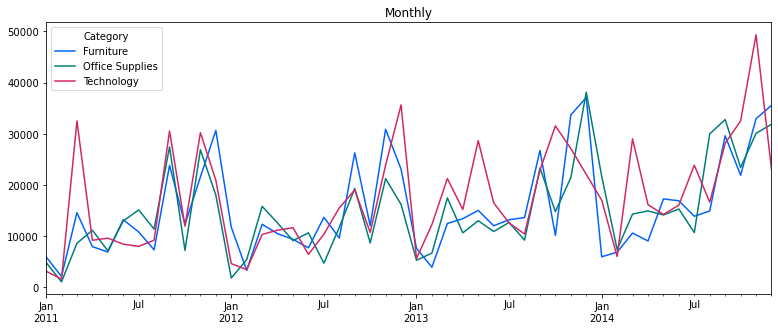

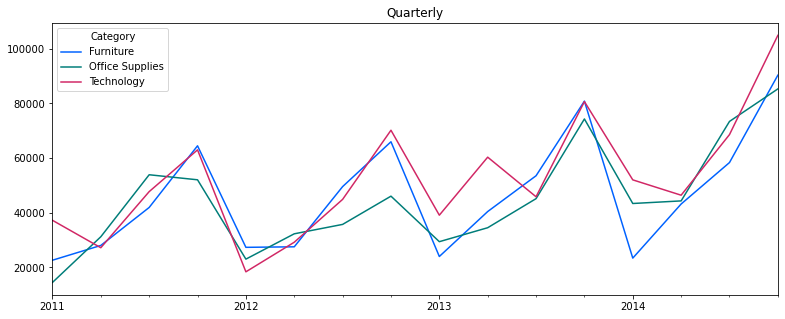

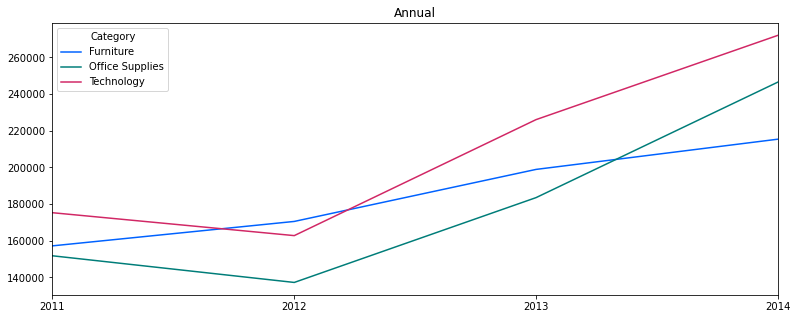

In [96]:
sales_monthly.plot(figsize = plotsize, title = 'Monthly')
sales_quarterly.plot(figsize = plotsize, title = 'Quarterly')
sales_yearly.plot(figsize= plotsize, title = 'Annual')

<AxesSubplot:title={'center':'Cumulative Sales quarterly'}>

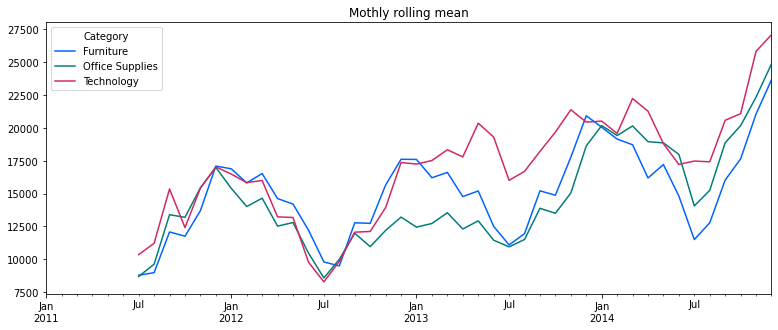

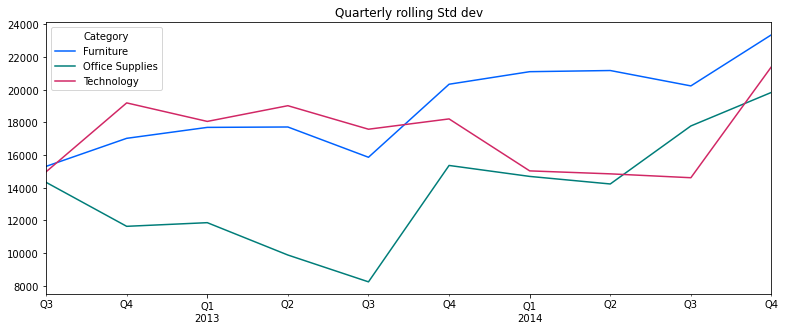

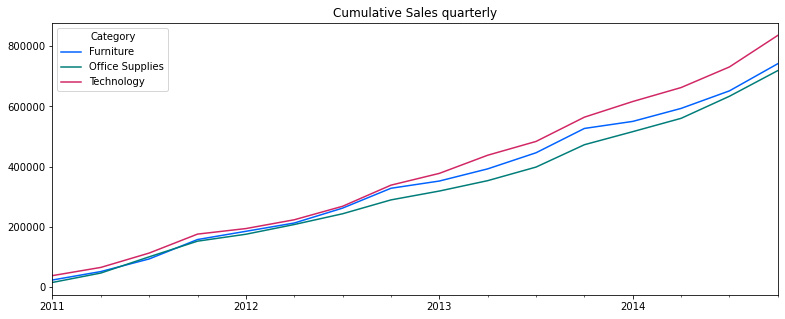

In [103]:
# Print the Rolling mean, std and cum sum

# 1. Rolling mean monthly
sales_monthly.rolling(window).mean().plot(figsize = plotsize, title='Mothly rolling mean')

#2. Rolling mean std dev
sales_quarterly.rolling(window).std().dropna().plot(figsize= plotsize, title='Quarterly rolling Std dev')

#3 Cum sum quarterly
sales_quarterly.cumsum().plot(figsize= plotsize, title='Cumulative Sales quarterly')

## Time Series Visualizations
There are a number of packages to help analyze Time Series data and create relevant plots. One example is __[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)__, which includes a number of methods for plotting Time Series-specific visualizations:
- __[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)__: Plot of the Autocorrelation Function
- __[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)__: Plot of the Partial Autocorrelation Function
- __[month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot)__: Seasonal Plot for Monthly Data
- __[quarter_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html#statsmodels.graphics.tsaplots.quarter_plot)__: Seasonal Plot for Quarterly Data

Some examples are illustrated below:


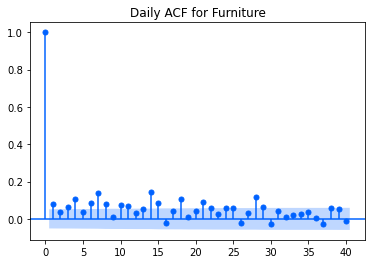

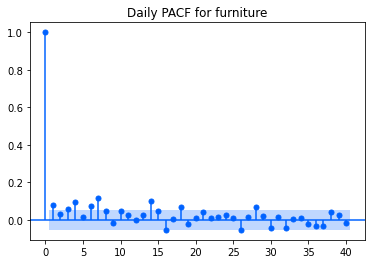

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# Plot Daily autocorrelation function for daily data
acf_d = plot_acf(sales['Furniture'], lags=40, title ='Daily ACF for Furniture')

# Plot Daily autocorrelation function for daily data
pacf_d = plot_pacf(sales['Furniture'], lags=40, title='Daily PACF for furniture')

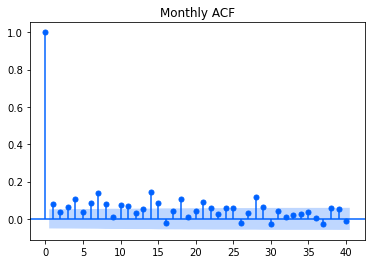

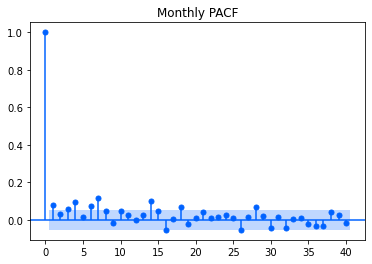

In [109]:
# MOnthly ACF and PACF
acf_m = plot_acf(sales['Furniture'], lags=40, title ='Monthly ACF')
pacf_m = plot_pacf(sales['Furniture'], lags=40, title ='Monthly PACF')

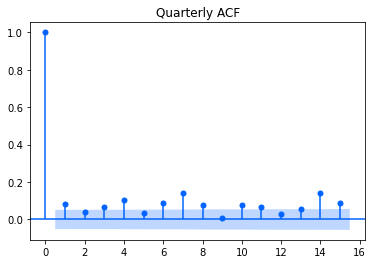

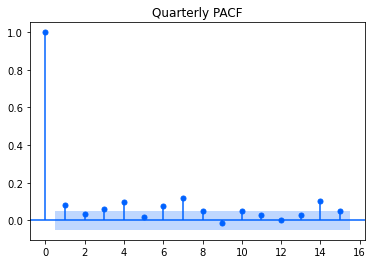

In [112]:
# Quarterly ACF AND PACF
acf_q = plot_acf(sales['Furniture'], lags=15, title='Quarterly ACF')
pacf_q = plot_pacf(sales['Furniture'], lags=15, title='Quarterly PACF')

Monthly data seasonal


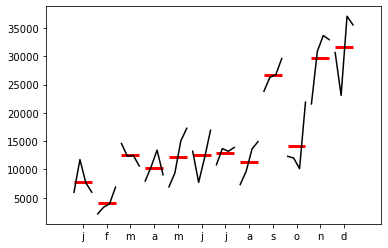

In [114]:
#Plotting Monthly plot

print('Monthly data seasonal')
m_plot = month_plot(sales_monthly['Furniture'])

Quarterly data seasonal


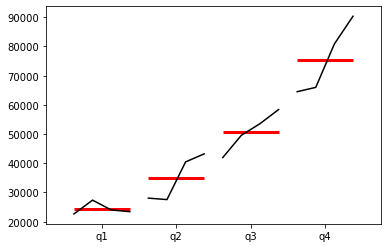

In [115]:
#Plotting Quar plot

print('Quarterly data seasonal')
q_plot = quarter_plot(sales_quarterly['Furniture'])

# Exercises
## Exercise 1:
Using the source data, set up Monthly data for Sales and Profit by Segment by either (1) Resampling or (2) Grouping data by Year and Month.

In [120]:
new_data= raw_data[['Order Date', 'Segment', 'Sales', 'Profit']]
new_data.set_index('Order Date', inplace=True)
new_data.shape

(9994, 3)

In [121]:
new_pivot = new_data.pivot_table(columns = 'Segment', index= 'Order Date')
new_pivot

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-04      5.6       nan         nan     16.4       nan         nan
2011-01-05      nan       nan       -22.0      nan       nan        96.0
2011-01-06      4.9       nan         nan     19.5       nan         nan
2011-01-07      9.3       5.2       191.9     19.4      12.8       625.0
2011-01-08    -36.0       nan         nan     43.6       nan         nan
...             ...       ...         ...      ...       ...         ...
2014-12-27     20.6      21.6        -2.6     44.8     383.4         3.1
2014-12-28      nan     -16.0         nan      nan      88.8         nan
2014-12-29     10.5      21.1         0.2     45.4     150.1        31.1
2014-12-30     50.6      69.0         nan    260.5     155.4         nan
2014-12-31      8.5       5.5        56.5    117.5      17.3       209.3

[1238 rows x 6 columns]

In [122]:
new_month = new_pivot.resample('M').sum()

In [124]:
new_month.head()

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31    106.5       5.9       185.0  1,304.1     568.0       855.9
2011-02-28    228.3     126.0        37.9  1,442.7     464.1       104.1
2011-03-31    -26.5     131.3        73.7  3,777.8   1,988.4     4,439.9
2011-04-30    336.9     435.6       527.9  3,752.8   3,951.2     2,031.6
2011-05-31    484.0     873.0       -63.3  5,373.2   4,077.7       696.1

## Exercise 2:
Analyze the results from the first exercise to determine whether Autocorrelation or Seasonal patterns differ by Segment or whether we are looking at Sales or Profits.

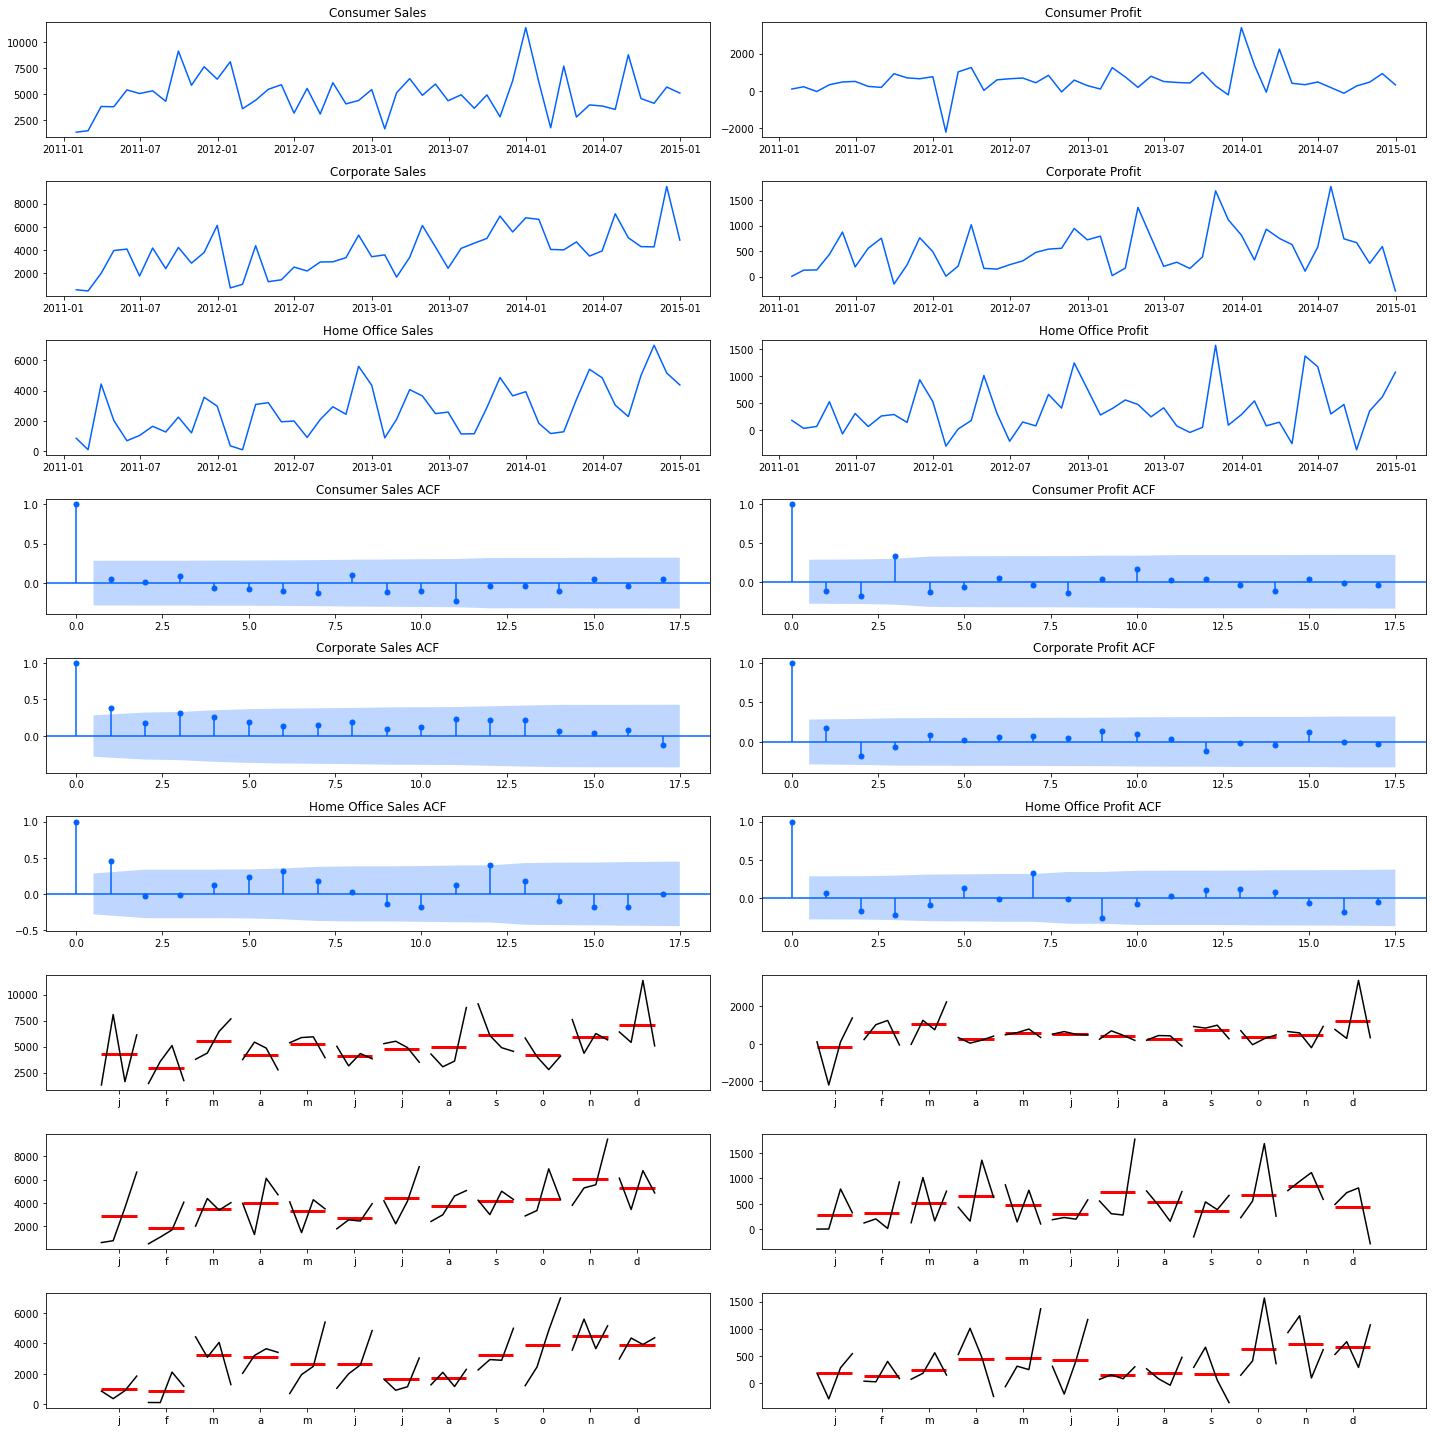

In [129]:
fig,axes = plt.subplots(9,2,figsize=(20,20),)
for i,seg in enumerate(['Consumer','Corporate','Home Office']):
    for j,mon in enumerate(['Sales','Profit']):
        axes[i,j].plot(new_month[mon,seg])
        axes[i,j].title.set_text(seg+' '+mon)
        plot_acf(new_month[mon,seg], ax = axes[i+3,j], title= seg+' '+mon+' ACF')
        month_plot(new_month[mon,seg], ax = axes[i+6,j])
        
fig.tight_layout()
plt.show()

In [130]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']
new_vars = [cat_var, date_var] + money_vars
new_vars

['Region', 'Order Date', 'Profit', 'Sales']